In [1]:
# SVM stands for Support Vector Machine
# Supervised Learning Algo
# We can use in both classification and Regression
# Perform both Linear and Non Linear data

In [2]:
# Importing Libraries
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Now we will load iris data
iris = load_iris(return_X_y = False)

In [4]:
# Want to see attributes in iris dataset
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
# We will do analysis with only two feature for better visualization 
iris.feature_names
# here we are choosing last 2 features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# taking data in X and y variable
X = iris.data[:,2:]
y = iris.target
print(X.shape , y.shape)

(150, 2) (150,)


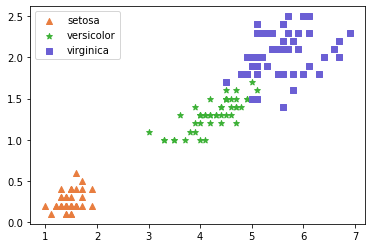

In [14]:
# Plotting data 
# In this , we have taken 1 class ak a time 
# samples is a list containing true and false accored to y == i or not -- depends on class
# if true then only , it will plot point of that class only
colors = ["#e87d3f" , "#3bb035" ,"#6b5fd4"]
markers = ["^" , "*" , "s"]
for i , name in enumerate(iris.target_names) :
    samples = (y == i)
    plt.scatter(X[samples , 0] , X[samples , 1] , c = colors[i] , marker = markers[i] , label = name)
plt.legend()
plt.show()

In [17]:
# Want to print samples with class 0 or 1
samples = (y == 0) | (y == 1)
samples

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [18]:
# We are going to use only 2 classes that is 0 and 1 class
X , y = X[samples] , y[samples]
print(X.shape , y.shape)

(100, 2) (100,)


In [19]:
# Now we will apply SVM 
from sklearn.svm import LinearSVC

In [20]:
lin_svc = LinearSVC()

In [23]:
lin_svc.fit(X,y)

LinearSVC()

In [24]:
lin_svc.predict([[2.4,1]])

array([1])

In [29]:
lin_svc.predict([[3,0.1]])

array([0])

In [39]:
# Now we will make a decision boundary
# make grid 
f1 = np.linspace(X[:,0].min() , X[:,0].max() , 80)
f2 = np.linspace(X[:,1].min() , X[:,1].max() , 80)
print(f1.shape , f2.shape)
f1 , f2 = np.meshgrid(f1 , f2)
print(f1.shape , f2.shape)
X_test = np.concatenate([f1.reshape(-1,1) , f2.reshape(-1 , 1)] , axis = 1)
print(X_test.shape)
ypred = lin_svc.predict(X_test)
print(ypred.shape)

(80,) (80,)
(80, 80) (80, 80)
(6400, 2)
(6400,)


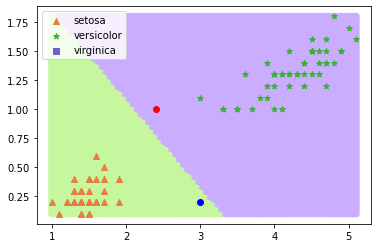

In [44]:
# Now we will plot all the X_test points to amke our decision boundary
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#c6f79e", "#cbadff"])

plt.scatter(X_test [:,0] , X_test[:,1] , c = ypred , cmap = cmap)

colors = ["#e87d3f" , "#3bb035" ,"#6b5fd4"]
markers = ["^" , "*" , "s"]
for i , name in enumerate(iris.target_names) :
    samples = (y == i)
    plt.scatter(X[samples , 0] , X[samples , 1] , c = colors[i] , marker = markers[i] , label = name)
plt.legend()
plt.scatter(2.4 , 1 , c = 'r')
plt.scatter(3 , 0.2 , c = 'b')
plt.show()

In [45]:
# Parameter C - Hyper Parameter
# more C : Hard Margin Classifier
# less C : Soft Margin Classifier

In [47]:
# Let us introduce a outlier 
X_ = np.concatenate([X , [[3,1]]] , axis = 0)
print(X_.shape)

(101, 2)


In [48]:
y_ = np.concatenate([y , [0]] , axis = 0)
print(y_.shape)

(101,)


In [49]:
# making LinearSVC for soft 
linsvc2 = LinearSVC(C = 1)
linsvc2.fit(X_,y_)

LinearSVC(C=1)

In [50]:
ypred2 = linsvc2.predict(X_test)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 101 but corresponding boolean dimension is 100

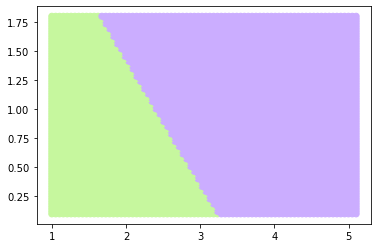

In [51]:
# Now we will plot the data
plt.scatter(X_test [:,0] , X_test[:,1] , c = ypred2 , cmap = cmap)

colors = ["#e87d3f" , "#3bb035" ,"#6b5fd4"]
markers = ["^" , "*" , "s"]
for i , name in enumerate(iris.target_names) :
    samples = (y == i)
    plt.scatter(X_[samples , 0] , X_[samples , 1] , c = colors[i] , marker = markers[i] , label = name)
plt.legend()
plt.show()